# Quantum State Tomography: Measuring the Wavefunction

## A single qubit

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
In this tutorial we will measure the wavefunction of an arbitrary quantum state. You might wonder how this is possible. After all, measurements only reveal the modulus square of the the wavefunction amplitudes. 

Indeed, with measurements in a single basis only, this would be unachievable (unless we are lucky and the quantum state is such that it *aligns* with our basis).

But what happens if we measure a quantum state and multiple bases? Consider the single-qubit example in the following exercise.
>**Exercise X.** Given the state $\ket{\psi} = \cos \frac{\theta}{2}\ket{0} + e^{i\varphi} \sin\frac{\theta}{2} \ket{1}$ show that 
>$$
\begin{aligned}
\langle \sigma_x \rangle &= \cos \varphi \sin \theta \\
\langle \sigma_y \rangle &= \sin \varphi \sin \theta \\
\langle \sigma_z \rangle &= \cos \theta \,,
\end{aligned}
$$
>
>i.e. the expectation value of the operators $\sigma_{x,y,z}$ are the projection of the Bloch vector on the $x,y,z-$axis

We see that both parameters $\theta$ and $\varphi$ can be uniquely determined from at most three measurements $\langle \sigma_x \rangle$, $\langle \sigma_y \rangle$, and $\langle \sigma_z \rangle$. So if we measure our qubit in these three directions, a reconstruction of the wavefunction, including all phases, is straightforward!

So far, we have considered a pure single-qubit state. Let us generalize this to mixed states as well. Then, our quantum state is described by a density matrix $\rho = \sum_n p_n \ket{\psi_n}\bra{\psi_n}$.

For a single qubit, a density matrix is a hermitian $2 \times 2$ matrix with $\text{Tr}\rho=1$. We can express it in the form

$$
\rho = \frac{1}{2} \left(1 + b_1 \sigma_x + b_2 \sigma_y + b_3 \sigma_z \right) =\frac{1}{2} \left(1 + \vec{b} \cdot \vec{\sigma} \right) \,.
$$

Take a moment to convince yourself that this is indeed a general expression.
> **Exercise X.** If the quantum state is pure, the density matrix can be written as $\rho = \ket{\psi}\bra{\psi}$. Use this to show that for $\ket{\psi} = \cos \frac{\theta}{2}\ket{0} + e^{i\varphi} \sin\frac{\theta}{2} \ket{1}$ it holds that
>
>$$
\vec{b} = 
\begin{pmatrix}
\cos \varphi \sin\theta\\
\sin \varphi \sin\theta\\
\cos\theta
\end{pmatrix}
$$

The vector $\vec{b}$ is called the *Bloch vector*. It fully characterizes a two level system. For pure states, its length is $|\vec{b}|=1$, i.e. it describes any point on the *Bloch sphere*. For mixed states, it can be $|\vec{b}|\le 1$ and therefore can point inside the Bloch sphere.

> **Exercise X.** Compute the eigenvalues of $\rho = \frac{1}{2} \left(1 + \vec{b} \cdot \vec{\sigma} \right)$. Show that $\rho$ is positive semidefinite if $|\vec{b}|\le 1$. A positive semidefinite matrix has eigenvalues $\ge 0$.


> **Exercise X.** The Pauli matrices satisfy the algebra $[\sigma_i, \sigma_j ] = 2 i \epsilon_{ijk} \sigma_k$ where $\epsilon_{ijk}$ is the fully symmetric tensor and summation over $k$ is implied. Use this fact, together with $\{\sigma_i,\sigma_j\}=2\delta_{ij}\mathbb{1}$, to show that 
$$\sigma_i \sigma_j = \delta_{ij}\mathbb{1} + i\epsilon_{ijk}\sigma_k$$.

> **Exercise X.** Use the definition of Pauli matrix algebra $[\sigma_i, \sigma_j ] = 2 i \epsilon_{ijk} \sigma_k$ and the fact that the trace is cyclic under permutations, $\text{Tr}(AB)=\text{Tr}(BA)$, to show that $\text{Tr}(\sigma_i)=0$.

> **Exercise X.** Show that $\text{Tr}(A+B)=\text{Tr}(A)+\text{Tr}(B)$.



Given our results from the previous exercises it is now easy to see that the density matrix for a single qubit can be constructed in the following way:

$$
\langle \sigma_i \rangle = \text{Tr} \left( \rho \sigma_i \right) = 
\frac{1}{2} \text{Tr} \left( \left(1 + b_1 \sigma_x + b_2 \sigma_y + b_3 \sigma_z \right) \sigma_i \right) = b_i
$$

We see that, just like in the pure case, the Bloch vector is $\vec{b}=\langle\vec{\sigma}\rangle$.

## $n$ qubits

The density-matrix approach generalizes nicely to the case of $n$ qubits. Here, a general density matrix can be written as

$$
\rho = \frac{1}{2^n} \left(1 + \sum_{i_1,i_2,\dots,i_n=0\\i_1+...+i_n>0}^{3} b_{i_1\dotsi_n} \sigma_{i_1} \sigma_{i_2} \dotsb \sigma_{i_n} \right) \,.
$$

Note that we are summing over indices $i_k=0,1,2,3$ but the case where all indices $i_k=0$ are zero simultaneously is excluded. We also use that $\sigma_0 = \mathbb{1}$ is the identity matrix. 
>**Exercise X.** How nany different coefficents $b_{i_1\dotsi_n}$ occur in above sum? How many independent entries does a hermitian $2^n \times 2^n$ matrix with trace $1$ have?


The coefficents $b_{i_1\dotsi_n}$ can now be obtained similarly to the 1-qubit case.

>**Exercise X.** Show that
$$ 
\langle \sigma_{i_1} \sigma_{i_2} \dotsb \sigma_{i_n} \rangle = \text{Tr} \left( \rho \sigma_{i_1} \sigma_{i_2} \dotsb \sigma_{i_n} \right) = b_{i_1i_2\dots i_n} 
$$


## Let's program the Quantum Computer...

Let us test out above theory on a quantum computer. We begin by importing some necessary python packages.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import qiskit as qk
import scipy

Now we specify the backend, that our quantum circuit will run on. For the beginning, we will choose the default simulator `'default.qubit'`. Once your code is working, you can select `'qiskit.ibmq'` to run the code on the actual IBM quantum computer.

In [2]:
dev = qml.device('default.qubit', wires=2, shots=1000, analytic=True)
#dev = qml.device('qiskit.ibmq', wires=2, backend='ibmq_qasm_simulator', shots=1000)

>**Exercise X.** Complete the function `create_quantum_state()` below that builds a quantum state. You may build a tw-qubit quantum state of your choice. The only requirement is that the two qubits are entangled.

In [3]:
def create_quantum_state():
    # solution
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

The code cell below creates a `QNodeCollection` that encompasses the 9 circuits shown in the figure below. These circuits create your state defined in `create_quantum_state()` and the perform measurements in all possible combinations of $x,y,z$-basis for the two qubits. For example, the first circuit measures both qubit in $x$-basis, the second circuit measures them in $x$ and $y$ basis, respectively, then $xz$, $yx$, $yy$, and so on...

In [4]:
def measurement(wires, basis):
    if basis == 0:
        qml.Hadamard(wires=wires)
    elif basis == 1:
        qml.S(wires=wires).inv()
        qml.Hadamard(wires=wires)
    
    
qnodes = qml.QNodeCollection()
x = []
for i in range(3):
    for j in range(3):
        
        @qml.qnode(dev)
        def circuit(i=i,j=j):
            create_quantum_state()
            measurement(wires=0, basis=i)
            measurement(wires=1, basis=j)
            return qml.probs(wires=[0,1])
        
        qnodes.append(circuit)

The experiment is executed by calling the function `qnodes()`.

In [5]:
res = qnodes()

`qnodes()` returns a $4 \times 9$ array. Each row corresponds to the measured probabilities of one of the 9 circuits. The columns corresponds to the measured outcomes `00` `01` `10` `11` from left to right.

In [6]:
print(res)

[[0.   0.5  0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]]


>**Exercise X.** The data in `res` is all you need to construct the density matrix $\rho$. Write the data processing code. Explicitly, compute the expectation values of the operators $b_{i_1i_2}=\langle \sigma_{i_1} \sigma_{i_2}\rangle$ that define the coefficients $b_{i_1i_2}$. Use these coefficients to construct the density matrix `rho`.
>
> **Note.** *The array `res` containes the measurements of $3^2=9$ quantum circuits. To construct $\rho$ you have to compute $4^2-1=15$ different expectation values $\langle \sigma_{i_1} \sigma_{i_2}\rangle$. Think carefully how it is possible to compute all of these expectation values from the 9 datasets.*

In [7]:
# solution, will add comments later or make things more clean
x = np.array([[0,1],[1,0]], dtype=complex)
y = np.array([[0,-1j],[1j,0]], dtype=complex)
z = np.array([[1,0],[0,-1]], dtype=complex)
e = np.array([[1,0],[0,1]], dtype=complex)
p = np.array([x,y,z])

pl = np.zeros((2,3))
mi = np.zeros((2,3))

rho = np.eye(4,dtype=complex)

for i in np.arange(3):
    for j in np.arange(3):
        idx = 3*i + j
        r = res[idx]
        plus = r[0] + r[3]
        minus = r[1] + r[2]
        rho += (plus - minus) / (plus + minus) * np.kron(p[i],p[j])
        
        for k in np.arange(3):
            if i == k:
                pl[0,k] += r[0] + r[2] 
                mi[0,k] += r[1] + r[3]
            if j == k:
                pl[1,k] += r[0] + r[1] 
                mi[1,k] += r[3] + r[2] 
                
for k in np.arange(3):
    rho += (pl[0,k] - mi[0,k]) / (pl[0,k] + mi[0,k]) * np.kron(p[k], e)
    rho += (pl[1,k] - mi[1,k]) / (pl[1,k] + mi[1,k]) * np.kron(e, p[k])
    
rho = rho/4

Let us plot the measured density matrix density matrix graphically. *Do you get the result that you expect?*

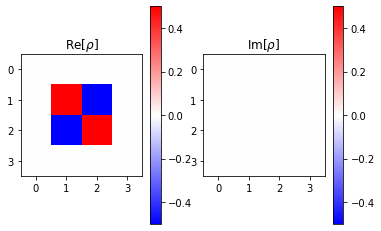

In [8]:
plt.figure()
plt.subplot(121)
plt.imshow(np.real(rho), clim=(-0.5,0.5), cmap='bwr')
plt.colorbar()
plt.title(r"Re[$\rho$]");
plt.subplot(122)
plt.imshow(np.imag(rho), clim=(-0.5,0.5), cmap='bwr')
plt.colorbar()
plt.title(r"Im[$\rho$]");

>**Exercise X.** Compute the entanglement entropy $S=-\text{Tr}(\rho \ln \rho)$ from the constructed density matrix `rho`.

In [9]:
# compute entanglement entropy
evals, vecs = la.eigh(rho)
evals_ = np.copy(evals)
evals_[evals<=0]=1
evals[evals<=0]=0
s_ent = -np.sum(evals*np.log(evals_))
print("Entanglement entropy: ", s_ent)

Entanglement entropy:  1.9499603408214548e-14


>**Exercise X. (Bonus)** Re-run the code on the actual IBM quantum computer. Compare the density matrix to the expected result. Compute the enganglement entropy $S$. Why is $S$ non-zero?